In [35]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import scipy
from scipy import stats as sps
from statsmodels.distributions.empirical_distribution import ECDF

import matplotlib.pyplot as plt
%matplotlib inline

Загрузим данные.

In [3]:
data = pd.read_csv("abalone.data", sep=",", header=None)
data = data[7].values
print data.shape[0], "- размер выборки"

4177 - размер выборки


Построим гистограмму и QQ-plot.

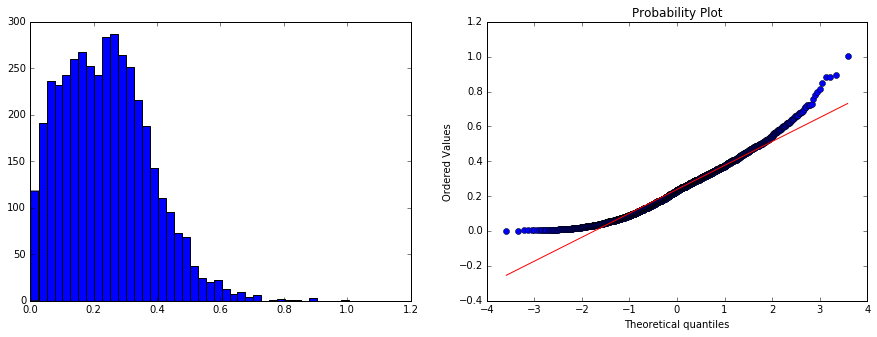

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
_ = plt.hist(data, bins=40, normed=False)
plt.subplot(122)
_ = scipy.stats.probplot(data, plot=plt, dist="norm")

Видно, что распределение далеко от нормального.

Посёрфив странички распределений на википедии, выглядел наиболее похожие. Для каждого из них проверяю гипотезу о том, что выборка из этого распределения с параметрами, заранее вычисленными.

In [ ]:
def apply_kstest(data, dist_name):
    dist = getattr(sps, dist_name)
    params = dist.fit(data)
    print(sps.kstest(data, dist_name, params))

    ecdf = ECDF(data)
    grid = np.linspace(0, 1, 500)

    plt.figure(figsize=(7, 3))
    plt.plot(grid, ecdf(grid), color='red', label='ecdf')
    plt.plot(grid, dist.cdf(grid, *params), color='blue', label='cdf')
    plt.legend()
    plt.show()

KstestResult(statistic=0.049226177402634019, pvalue=3.2312272813996679e-09)


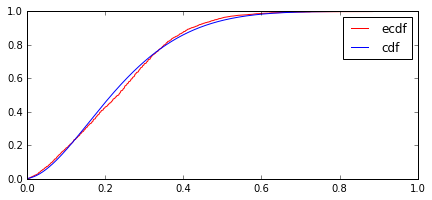

In [28]:
apply_kstest(data, "beta")

KstestResult(statistic=0.046965868854345727, pvalue=1.9870170855106865e-08)


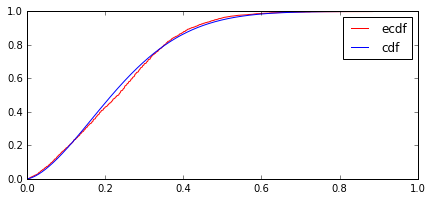

In [29]:
apply_kstest(data, "nakagami")

KstestResult(statistic=0.033052904890632895, pvalue=0.00021744773094727591)


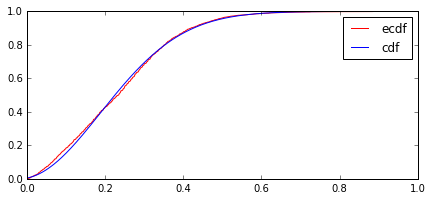

In [30]:
apply_kstest(data, "rice")

KstestResult(statistic=0.033065626594334957, pvalue=0.00021592510631583456)


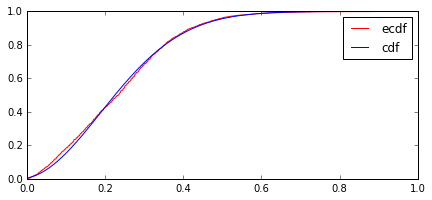

In [31]:
apply_kstest(data, "rayleigh")

Для русской википедии похожие распределения закончились, и гипотезы для них отклоняются даже на уровне значимости 0.001.

Обратимся к англоязычной википедии и поглядим похожие распределения оттуда.

Тут я случайно запустил распределение Бурра 3-го типа, вместо 12го, который был на википедии (в scipy.stats есть только эти 2 типа, а на википедии лишь 12ый)

KstestResult(statistic=0.014469978035716813, pvalue=0.34600940979205835)


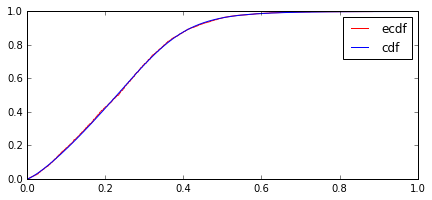

In [41]:
apply_kstest(data, "burr")

Класс! Нашли распределение, гипотеза для которого не отклоняется на уровне значимости 0.34! Это распределение Бурра 3го типа:
http://www.itl.nist.gov/div898/software/dataplot/refman2/auxillar/bu3pdf.htm

Проверим ещё несколько распределений для интереса.

KstestResult(statistic=0.044048801547806327, pvalue=1.825771030415915e-07)


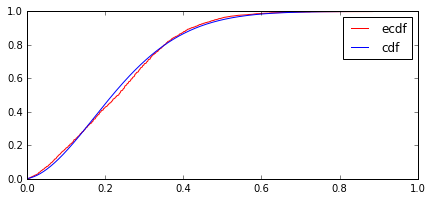

In [43]:
apply_kstest(data, "burr12")

KstestResult(statistic=0.052133790423555815, pvalue=2.7549335273006094e-10)


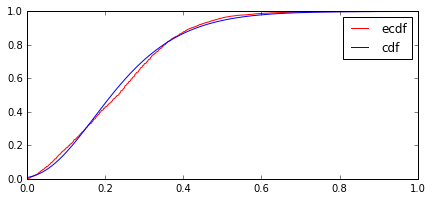

In [37]:
apply_kstest(data, "erlang")

KstestResult(statistic=0.052135250028816138, pvalue=2.7514331058349403e-10)


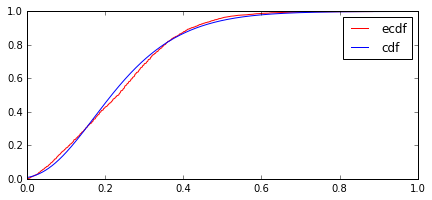

In [38]:
apply_kstest(data, "gamma")

Итого, на уровне значимости 0.001 (дост-но малого для множественной проверки с 8 гипотезами) 7 гипотез отвергнуто и одна гипотеза не отклонена даже на уровне значимости 0.34.

Т.о. заключаем, что выборка из распределения Бурра 3го типа: Burr3(6.53,0.19), loc=0.001, scale=0.39